In [196]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import random

# Slow Zone Modularity Analysis

In [2]:
bronx_all = pd.read_csv('all_bronx_edges.csv')
queens_all = pd.read_csv('all_queens_edges.csv')

In [3]:
bronx_all.head()

,Unnamed: 0,SegmentID,NodeIDFrom,NodeIDTo,LCB2010,RCB2010,persons_injured,pedestrians_injured,volume_count
0,0,78126,47740,9045677,3001,2000,2.0,0.0,0.0
1,1,79796,48679,48678,2000,1004,0.0,0.0,0.0
2,2,77356,47288,47822,2000,3006,0.0,0.0,0.0
3,3,73490,45034,45038,1004,1008,0.0,0.0,0.0
4,4,174633,84655,45050,1003,1001,0.0,0.0,0.0


In [5]:
bronx_all_graph = nx.from_pandas_edgelist(bronx_all,source='NodeIDFrom',target='NodeIDTo',edge_attr=['SegmentID','persons_injured','pedestrians_injured','volume_count'])

In [10]:
bronx_all_graph[47740][9045677]

{'SegmentID': 78126,
 'pedestrians_injured': 0.0,
 'persons_injured': 2.0,
 'volume_count': 0.0}

In [86]:
node_indicators = pd.read_csv('node_slow_zone_indicators.csv')#.fillna(0)
node_indicators.sort_values('zone_ind').head()

,Unnamed: 0,NODEID,name,year,zone_ind
0,1,1,NaN,NaN,0
87649,87650,92158,NaN,NaN,0
87648,87649,92157,NaN,NaN,0
87647,87648,92156,NaN,NaN,0
87646,87647,92155,NaN,NaN,0


In [88]:
node_dict = pd.Series(node_indicators.zone_ind,index=node_indicators.NODEID).to_dict()
print(node_dict)

nx.set_node_attributes(bronx_all_graph,node_dict,'slow_zone_ind')

{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 0.0, 89: 0.0, 90: 0.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.0, 99: 0.0, 100: 0.0, 101: 0.0, 102: 0.0, 103: 0.0, 104: 0.0, 105: 0.0, 106: 0.0, 107: 0.0, 108: 0.0, 109: 0.0, 110: 0.0, 111: 0.0, 112: 0

https://stackoverflow.com/questions/29897243/graph-modularity-in-python-networkx
https://networkx.github.io/documentation/latest/reference/generated/networkx.linalg.modularitymatrix.modularity_matrix.html

In [192]:
A_unweighted = nx.to_numpy_matrix(bronx_all_graph)
node_degrees = bronx_all_graph.degree(weight='persons_injured')
node_indicators = nx.get_node_attributes(bronx_all_graph,'slow_zone_ind')
n_edges = A_unweighted.sum()/2

In [84]:
bronx_all_modmtx = nx.modularity_matrix(bronx_all_graph, nodelist=None, weight='persons_injured')

In [85]:
print(bronx_all_modmtx)

[[-1.45586897e-03  1.99927207e+00 -7.27934486e-04 ... -3.63967243e-04
   0.00000000e+00  0.00000000e+00]
 [ 1.99927207e+00 -3.63967243e-04 -3.63967243e-04 ... -1.81983621e-04
   0.00000000e+00  0.00000000e+00]
 [-7.27934486e-04 -3.63967243e-04 -3.63967243e-04 ... -1.81983621e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [-3.63967243e-04 -1.81983621e-04 -1.81983621e-04 ... -9.09918107e-05
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


# Betweenness Centralities

In [73]:
bronx_counts = pd.read_csv('bronx_traffic_edges.csv')
queens_counts = pd.read_csv('queens_traffic_edges.csv')

In [74]:
bronx_counts.head()

,Unnamed: 0,SegmentID,NodeIDFrom,NodeIDTo,LCB2010,RCB2010,persons_injured,pedestrians_injured,volume_count
0,188,81384,49666,54110,1025,1026,0.0,0.0,9021.0
1,346,88039,53649,53715,4006,1004,0.0,0.0,3027.0
2,422,69588,42728,42732,1018,1007,0.0,0.0,4951.0
3,494,88020,53640,53641,2000,1001,0.0,0.0,8288.0
4,502,88031,53645,53653,1003,3000,4.0,1.0,4763.0


In [75]:
bronx_nonzero_graph = nx.from_pandas_edgelist(bronx_counts,source='NodeIDFrom',target='NodeIDTo',edge_attr=['SegmentID','persons_injured','pedestrians_injured','volume_count'])

In [122]:
crash_degrees = list(bronx_nonzero_graph.degree(weight='persons_injured'))
flow_degrees = list(bronx_nonzero_graph.degree(weight='volume_count'))
flow_centrality_dict = nx.betweenness_centrality(bronx_nonzero_graph,weight='volume_count').values()

crash_degrees_only = []
flow_degrees_only = []
list_len = len(crash_degrees)

for idx in range(list_len):
    crash_degrees_only.append(crash_degrees[idx][1])
    flow_degrees_only.append(flow_degrees[idx][1])

In [128]:
len(flow_centrality_list)

356

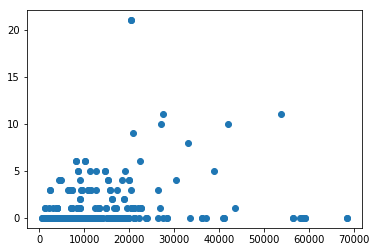

In [116]:
plt.scatter(flow_degrees_only,crash_degrees_only)

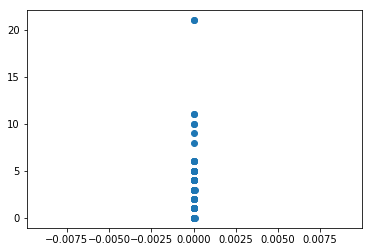

In [117]:
plt.scatter(flow_centrality_list,crash_degrees_only)

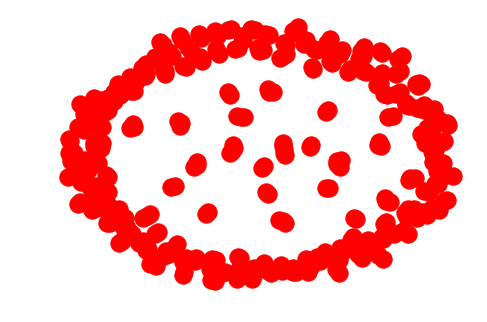

In [211]:
nx.draw(bronx_nonzero_graph)

## Find centralities for original graph -- subset to nodes with non-zero traffic volume degree

In [129]:
flow_centrality_all = nx.betweenness_centrality(bronx_all_graph,weight='volume_count')
flow_centrality_subset = dict((k, flow_centrality_all[k]) for k in flow_centrality_keys)

In [140]:
subset_vals = flow_centrality_subset.values()

(0, 1)

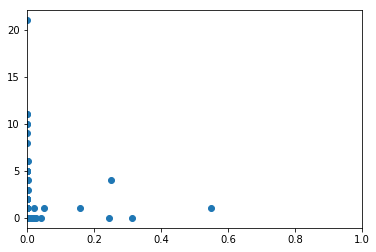

In [142]:
plt.scatter(subset_vals,crash_degrees_only)
plt.xlim(0,1)

## Randomly assign degrees to be within range of adjacent nodes' traffic volume degrees 

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html

In [185]:
node_list = list(bronx_all_graph.nodes())
n = len(node_list)
neighbor_dict = {}

bronx_all_adj = bronx_all_graph.adj
range_dict = {}
temp_list = []

for node_idx in range(n):
    temp_node = node_list[node_idx]
    node_info = bronx_all_graph.adj[temp_node]
    #print(node_info)
    n_keys = len(node_info)
    #print(n_keys)
    for key_idx in range(n_keys):
        #print(key_idx)
        temp_key = list(node_info.keys())[key_idx]
        temp_list.append(node_info[temp_key]['volume_count'])
    max_count = max(temp_list)
    min_count = min(temp_list)
    range_dict.update({temp_node:{'max':max_count,'min':min_count}})
    temp_list = []

In [186]:
print(range_dict)

{47740: {'max': 0.0, 'min': 0.0}, 9045677: {'max': 0.0, 'min': 0.0}, 48679: {'max': 0.0, 'min': 0.0}, 48678: {'max': 0.0, 'min': 0.0}, 47288: {'max': 0.0, 'min': 0.0}, 47822: {'max': 0.0, 'min': 0.0}, 45034: {'max': 0.0, 'min': 0.0}, 45038: {'max': 0.0, 'min': 0.0}, 84655: {'max': 0.0, 'min': 0.0}, 45050: {'max': 0.0, 'min': 0.0}, 47763: {'max': 0.0, 'min': 0.0}, 47765: {'max': 0.0, 'min': 0.0}, 47788: {'max': 0.0, 'min': 0.0}, 47803: {'max': 0.0, 'min': 0.0}, 47792: {'max': 0.0, 'min': 0.0}, 49300: {'max': 0.0, 'min': 0.0}, 49298: {'max': 0.0, 'min': 0.0}, 48563: {'max': 0.0, 'min': 0.0}, 48576: {'max': 0.0, 'min': 0.0}, 47745: {'max': 0.0, 'min': 0.0}, 47840: {'max': 0.0, 'min': 0.0}, 95303: {'max': 0.0, 'min': 0.0}, 49337: {'max': 0.0, 'min': 0.0}, 47856: {'max': 6531.0, 'min': 0.0}, 47858: {'max': 0.0, 'min': 0.0}, 44749: {'max': 0.0, 'min': 0.0}, 48560: {'max': 0.0, 'min': 0.0}, 44304: {'max': 0.0, 'min': 0.0}, 47798: {'max': 0.0, 'min': 0.0}, 9004993: {'max': 0.0, 'min': 0.0}, 44

In [189]:
nonzero_cases = {}

for node_idx in range(n):
    node_key = node_list[node_idx]
    if range_dict[node_key]['max'] > 0:
        nonzero_cases.update({node_key: range_dict[node_key]})

In [191]:
print(len(nonzero_cases))

# number of nodes that will be filled still very sparse

325


## Create random network topology with same number of nodes

In [195]:
node_len = len(list(bronx_nonzero_graph.nodes()))
print(node_len)

356


In [206]:
to_node = random.sample(range(0, node_len), node_len)
from_node = random.sample(range(0, node_len), node_len)

rand_edge = pd.DataFrame()
rand_edge['to_node'] = to_node
rand_edge['from_node'] = from_node

#add clause to avoid self-loops

rand_edge['persons_injured'] = bronx_counts['persons_injured']
rand_edge['volume_count'] = bronx_counts['volume_count']

In [207]:
random_graph = nx.from_pandas_edgelist(rand_edge,source='from_node',target='to_node',edge_attr=['persons_injured','volume_count'])

In [209]:
r_crash_degrees = list(random_graph.degree(weight='persons_injured'))
r_flow_betweenness = nx.betweenness_centrality(random_graph,weight='volume_count').values()

r_degrees_only = []

for idx in range(node_len):
    r_degrees_only.append(r_crash_degrees[idx][1])

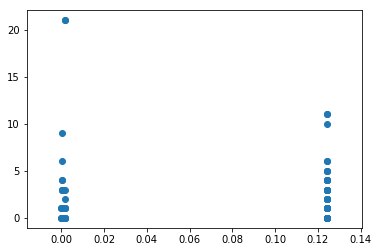

In [210]:
plt.scatter(r_flow_betweenness,r_degrees_only)

## Randomly assign counts to larger network based on distribution of existing values

In [223]:
sorted_flow_degrees = sorted(flow_degrees_only)

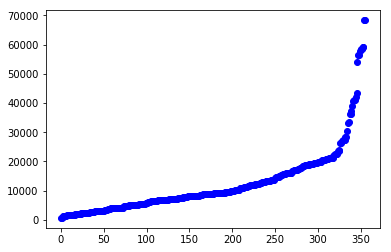

In [224]:
plt.plot(sorted_flow_degrees,'bo')

# Spectral Partitioning